In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,stratify=y, test_size=0.2,random_state=42)

In [2]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log',random_state=42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test,y_test)

/Users/chaseungjun/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8333333333333334

In [3]:
sgd=SGDClassifier(loss='hinge',random_state=42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test,y_test)

0.9385964912280702

In [4]:
x = cancer.data
y = cancer.target
x_train_all,x_test,y_train_all,y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [5]:
x_train,x_val,y_train,y_val = train_test_split(x_train_all,y_train_all,stratify=y_train_all,test_size=0.2,random_state=42)
print(len(x_train),len(x_val))

364 91


In [6]:
sgd = SGDClassifier(loss='log_loss',random_state=42)
sgd.fit(x_train,y_train)
sgd.score(x_val,y_val)

0.6923076923076923

['mean perimeter' 'mean area']


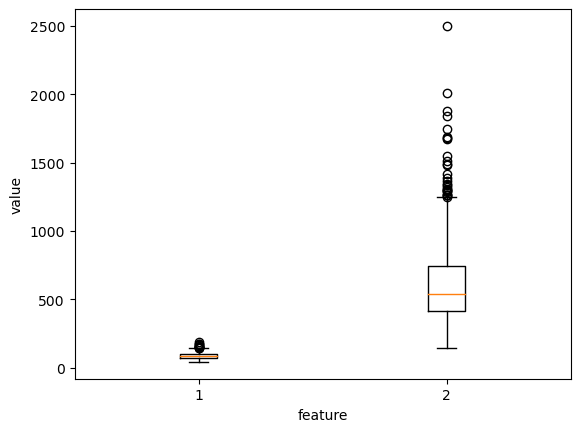

In [8]:
#data preprocessing
import matplotlib.pyplot as plt
# 1. non scaled-data
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:,2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [9]:
# apply linear regression to non-scaled data
import numpy as np
class SingleLayer:

    def __init__(self,learning_rate=0.1):
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []
        self.lr = learning_rate

    def forpass(self,x):
        z = np.sum(x*self.w) + self.b
        return z

    def backprop(self,x,err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad

    def activation(self,z):
        z = np.clip(z,-100,None)
        a = 1 / (1+np.exp(-z))
        return a

    def fit(self,x,y,epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        self.w_history.append(self.w.copy())
        np.random.seed(42)
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i]-a)
                w_grad, b_grad = self.backprop(x[i],err)
                self.w -= self.lr * w_grad
                self.b -= b_grad
                
                self.w_history.append(self.w.copy())
                
                a = np.clip(a,1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i]*np.log(1-a)))
            self.losses.append(loss/len(y))

    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z)>0

    def score(self,x,y):
        return np.mean(self.predict(x)==y)

In [10]:
layer1 = SingleLayer()
layer1.fit(x_train,y_train)
layer1.score(x_val,y_val)

0.9120879120879121

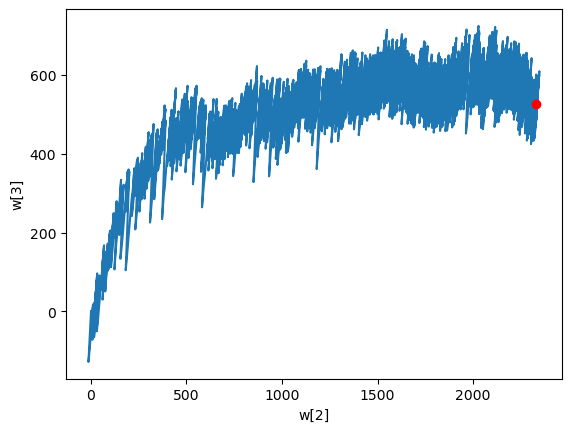

In [11]:
w2 = []
w3 = []
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [12]:
# mean area's scale is way greater than mean perimeter, resulting in a drastic change in w3
# 2. adjusting scale of a model - standardization
train_mean = np.mean(x_train,axis=0)
train_std = np.std(x_train,axis=0)
x_train_scaled = (x_train - train_mean) / train_std

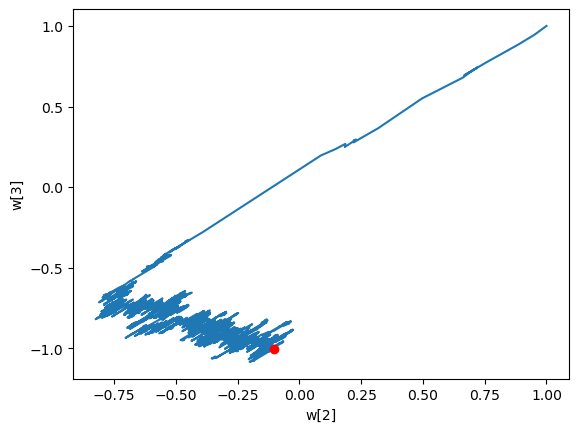

In [13]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled,y_train)
w2 = []
w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [14]:
# evaluation of model
layer2.score(x_val,y_val)


0.37362637362637363

In [15]:
# WHAT WHY 37%
# OH not scaled 
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val,axis=0)
x_val_scaled=(x_val-val_mean)/val_std
layer2.score(x_val_scaled,y_val)

0.967032967032967

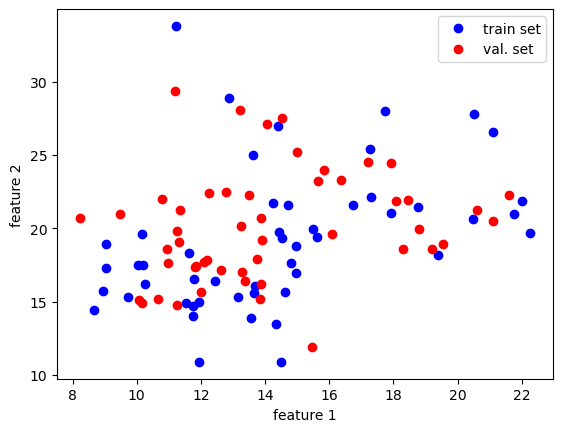

In [17]:
# easy to make mistakes after scaling
plt.plot(x_train[:50,0],x_train[:50,1],'bo')
plt.plot(x_val[:50,0],x_val[:50,1],'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

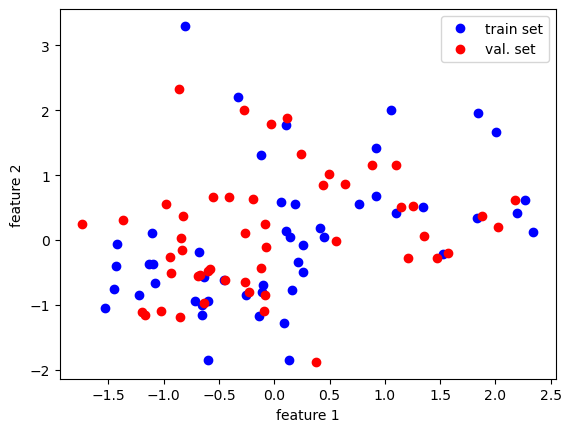

In [18]:
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

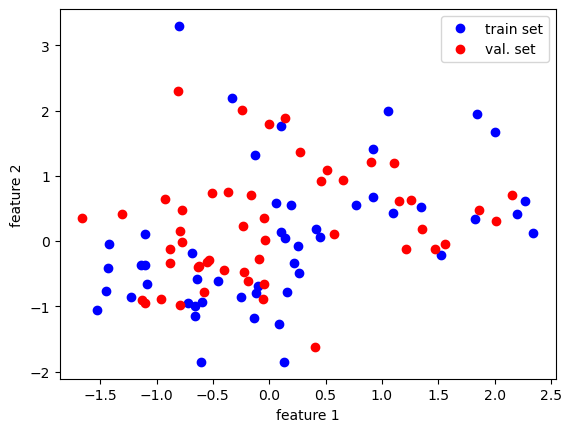

In [19]:
# teeny bit changed -> preprocessed with different percentages
x_val_scaled = (x_val-train_mean)/train_std
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val. set'])
plt.show()

In [20]:
layer2.score(x_val_scaled,y_val)

0.967032967032967